# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [76]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [77]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [78]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [79]:
df_train.shape

(15223, 52)

In [80]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [81]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [82]:
df_test.shape

(14910, 52)

In [83]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [84]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [85]:
df = df_test.append(df_train).reset_index(drop=True)

In [86]:
set(df['sample'])

{'test', 'train'}

In [87]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [89]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Два и более высших образования', 'Неполное среднее', 'Среднее специальное', 'Ученая степень', 'Среднее', 'Неоконченное высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Состою в браке', 'Гражданский брак', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{'Информационные технологии', nan, 'Банк/Финансы', 'Развлечения/Искусство', 'Сборочные производства', 'Недвижимость', 'Информационные услуги', 'Страхование', 'Маркетинг', 'Туризм', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Химия/Парфюмерия/Фармацевтика', 'Сельское хозяйство', 'Наука', 'ЧОП/Детективная д-ть', 'Энергетика', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'СМИ/Реклама/PR-агенства', 'Государственная служба', 'Другие сферы', 'Образование', 'Подбор персонала', 'Строительство', 'Салоны красоты и здоровья', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Торговля', 'Нефтегазовая промышленность', 'Логистика', 'Здравоохранение'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [90]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [91]:
df['WORK_TIME'].median()

48.0

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

1) выведем список признаков с пропусками

In [92]:
df[['GEN_INDUSTRY',
'GEN_TITLE',
'ORG_TP_STATE',
'ORG_TP_FCAPITAL',
'JOB_DIR',
'TP_PROVINCE',
'REGION_NM',
'WORK_TIME',
'ORG_TP_FCAPITAL']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 9 columns):
GEN_INDUSTRY       27420 non-null object
GEN_TITLE          27420 non-null object
ORG_TP_STATE       27420 non-null object
ORG_TP_FCAPITAL    27425 non-null object
JOB_DIR            27420 non-null object
TP_PROVINCE        29543 non-null object
REGION_NM          30131 non-null object
WORK_TIME          27416 non-null float64
ORG_TP_FCAPITAL    27425 non-null object
dtypes: float64(1), object(8)
memory usage: 2.1+ MB


2) посмотрим описание

In [93]:

for i in df_descr.loc[df_descr['ПОЛЕ'].isin(['GEN_INDUSTRY',
'GEN_TITLE',
'ORG_TP_STATE',
'ORG_TP_FCAPITAL',
'JOB_DIR',
'TP_PROVINCE',
'REGION_NM',
'WORK_TIME',
'PORG_TP_FCAPITAL'])]['ОПИСАНИЕ']:
    print(i)


отрасль работы клиента
должность
форма собственности компании
отношение к иностранному капиталу
направление деятельности в нутри компании
область торговой точки, где клиент брал последний кредит
регион РФ
время работы на текущем месте (в месяцах)


#### Предложение, что можно сделать с пропусками:

#### 1) Числовые заполнять медианой или средним - !!!применяем!!!

#### 2) Категориальные признаки заполнить новой категорией - !!!применяем!!!

#### 3) "PREVIOUS_CARD_NUM_UTILIZED" содержит слишком мало данных - откинем

4) Категориальные признаки с пропусками можно отбросить, но если они важны, то лучше строить модель только на объекты для которых заполнены все признаки: 

    Например:
1) Строим модель только на 27420 объектов и считаем метрики качества
2) Затем строим модель на этих же объектах откинув поля, в которых ранее (до токо как откинули данные) видели пропуски и считаем метрики качества
3) Если разницы сильной нет, то работаем со всеми данными, но эти признаки выкидываем
4) Если разница сильная, то работаем только с объектами, где есть данные по всем признакам



In [94]:
# откинем PREVIOUS_CARD_NUM_UTILIZED
df = df.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

In [95]:
df.WORK_TIME[df.WORK_TIME.isnull()] = df.WORK_TIME.median()

C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:

df.GEN_INDUSTRY[df.GEN_INDUSTRY.isnull()] = 'Неизвестно'
df.GEN_TITLE[df.GEN_TITLE.isnull()] = 'Неизвестно'
df.ORG_TP_STATE[df.ORG_TP_STATE.isnull()] = 'Неизвестно'
df.JOB_DIR[df.JOB_DIR.isnull()] = 'Неизвестно'
df.TP_PROVINCE[df.TP_PROVINCE.isnull()] = 'Неизвестно'
df.REGION_NM[df.REGION_NM.isnull()] = 'Неизвестно'
df.ORG_TP_FCAPITAL[df.ORG_TP_FCAPITAL.isnull()] = 'Неизвестно'


C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\iseob\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\iseob\Anaconda3\lib\

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
AGREEMENT_RK               30133 non-null int64
TARGET                     30133 non-null int64
AGE                        30133 non-null int64
SOCSTATUS_WORK_FL          30133 non-null int64
SOCSTATUS_PENS_FL          30133 non-null int64
GENDER                     30133 non-null int64
CHILD_TOTAL                30133 non-null int64
DEPENDANTS                 30133 non-null int64
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
GEN_INDUSTRY               30133 non-null object
GEN_TITLE                  30133 non-null object
ORG_TP_STATE               30133 non-null object
ORG_TP_FCAPITAL            30133 non-null object
JOB_DIR                    30133 non-null object
FAMILY_INCOME              30133 non-null object
PERSONAL_INCOME            30133 non-null object
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROV

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки есть: EDUCATION/MARITAL_STATUS/GEN_INDUSTRY/GEN_TITLE/ORG_TP_STATE/ORG_TP_FCAPITAL/JOB_DIR/FAMILY_INCOME/REG_ADDRESS_PROVINCE/FACT_ADDRESS_PROVINCE/POSTAL_ADDRESS_PROVINCE/TP_PROVINCE/REGION_NM

#### их нужно приеобразовать в числовые бинарные. 
 
    
категориальные признаки с гео характеристиками сильно пересекаются (на первый взгляд), можно пробовать избавиться от некоторых и перещитать качество модели.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [99]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    ## пропуски обработал на предыдущем этапе
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','FAMILY_INCOME', 'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM', 'JOB_DIR','ORG_TP_STATE','ORG_TP_FCAPITAL'])
    ##откидывал для теста - 'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM', 'JOB_DIR','ORG_TP_STATE','ORG_TP_FCAPITAL'
    return df_output

In [100]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [127]:
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,JOB_DIR_Юридическая служба,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Неизвестно,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная ком. с инос. капиталом,ORG_TP_STATE_Частная компания,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_Неизвестно,ORG_TP_FCAPITAL_С участием
14910,0,49,1,0,1,2,1,5000.0,1,1,...,0,0,0,0,0,0,1,1,0,0
14911,0,32,1,0,1,3,3,12000.0,1,1,...,0,0,1,0,0,0,0,1,0,0
14912,0,52,1,0,1,4,0,9000.0,1,1,...,0,1,0,0,0,0,0,1,0,0
14913,0,39,1,0,1,1,1,25000.0,0,1,...,0,1,0,0,0,0,0,1,0,0
14914,0,30,1,0,0,0,0,12000.0,1,1,...,0,1,0,0,0,0,0,1,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [132]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [133]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Your Code Here


In [134]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
dtc.fit(XX_train, yy_train)
predict = dtc.predict(XX_test)
predict_pr = dtc.predict_proba(XX_test)


dtc3 = RandomForestClassifier()
dtc3.fit(XX_train, yy_train)
predict3 = dtc3.predict(XX_test)
predict_pr3 = dtc3.predict_proba(XX_test)


dtc4 = LogisticRegression()
dtc4.fit(XX_train, yy_train)
predict4 = dtc4.predict(XX_test)
predict_pr4 = dtc4.predict_proba(XX_test)
## Your Code Here

In [135]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Посчитать метрики стандартные
# accuracy, precision, recall

print('precision', precision_score(yy_test, predict))
print('recall', recall_score(yy_test, predict))
print('accuracy', accuracy_score(yy_test, predict))

print('-'*10)

print('precision', precision_score(yy_test, predict3))
print('recall', recall_score(yy_test, predict3))
print('accuracy', accuracy_score(yy_test, predict3))

print('-'*10)

print('precision', precision_score(yy_test, predict4))
print('recall', recall_score(yy_test, predict4))
print('accuracy', accuracy_score(yy_test, predict4))


precision 0.1552511415525114
recall 0.16721311475409836
accuracy 0.7884156050955414
----------
precision 0.17391304347826086
recall 0.006557377049180328
accuracy 0.8755971337579618
----------
precision 0.4
recall 0.003278688524590164
accuracy 0.8783837579617835


In [136]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(yy_test, predict)
precision3, recall3, thresholds3 = precision_recall_curve(yy_test, predict3)
precision4, recall4, thresholds4 = precision_recall_curve(yy_test, predict4)

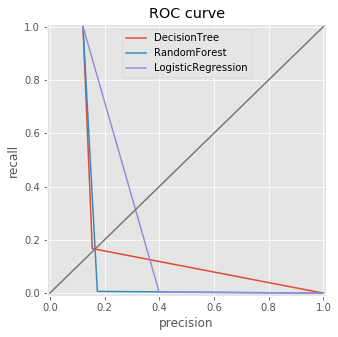

In [137]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)


plt.figure(figsize=(5, 5))
plt.plot(precision, recall, label='DecisionTree')
plt.plot(precision3, recall3, label='RandomForest')
plt.plot(precision4, recall4, label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc='best');

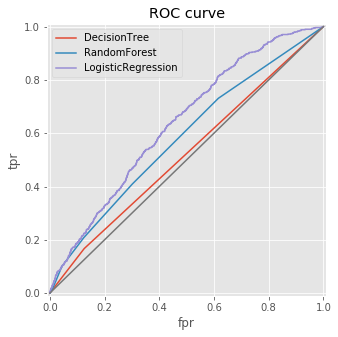

In [138]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе


%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(yy_test, predict_pr[:,1])
fpr3, tpr3, thresholds3 = roc_curve(yy_test, predict_pr3[:,1])
fpr4, tpr4, thresholds4 = roc_curve(yy_test, predict_pr4[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='DecisionTree')
plt.plot(fpr3, tpr3, label='RandomForest')
plt.plot(fpr4, tpr4, label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(loc='best');

In [150]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [152]:
cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv = 10
).mean()

# не получилось cross_val_score(.....,cv=cv ) - TypeError: 'StratifiedKFold' object is not iterable
# и не получилось cross_val_score(.....,cv.split(X,y)) - SyntaxError: positional argument follows keyword argument

0.5348920167271108

In [157]:
cross_val_score(
    dtc3,
    X,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.594120517980981

In [156]:
cross_val_score(
    dtc4,
    X,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.6566855808704373

In [144]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

dtc5 = LogisticRegression()
dtc5.fit(X, y)
predict_pr5 = dtc5.predict_proba(X_test)

## Your Code Here

C:\Users\iseob\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [145]:
# Померить roc_auc на тесте
roc_auc_score(y_test, predict_pr5[:,1])


0.6821592705167174